# Exploartory Analysis - Assignment 1 (Part 1)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

The dataset that I have chosen is the **'Rental prices of different places in the United States'**

In [2]:
# Loading dataset
# original data
data = pd.read_csv("price.csv")
data.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [3]:
# Getting th dimensions of the data
data.shape

(13131, 81)

In [4]:
# converting all the column names into lowercase for consistency
data.columns = map(str.lower, data.columns)

### Missing values

In [5]:
# to display the number of null values in each coulmn - identifying missing data
data.isnull().sum()

city code             0
city                  0
metro              1232
county                0
state                 0
population rank       0
november 2010      1783
december 2010      1783
january 2011       1783
february 2011      1631
march 2011         1458
april 2011         1409
may 2011           1399
june 2011          1399
july 2011          1399
august 2011        1399
september 2011     1397
october 2011       1383
november 2011      1383
december 2011      1162
january 2012       1162
february 2012      1162
march 2012         1162
april 2012            0
may 2012              0
june 2012             0
july 2012             0
august 2012           0
september 2012        0
october 2012          0
                   ... 
august 2014           0
september 2014        0
october 2014          0
november 2014         0
december 2014         0
january 2015          0
february 2015         0
march 2015            0
april 2015            0
may 2015              0
june 2015       

We can see that there are a few null values in the columns.
When we take statistical information out of this data, we will not get the appropriate mean, median or standard deviation.

Instead, we will try to fill in these values using **df.fillna()** with the mean of the remaining data of the column to get an appropriate 5 point summary. 

**Note:** 'inplace' = True is used in case you want to modify the existing DataFrame.


In [6]:
data.fillna(data.mean(), inplace=True)
data

,city code,city,metro,county,state,population rank,november 2010,december 2010,january 2011,february 2011,...,april 2016,may 2016,june 2016,july 2016,august 2016,september 2016,october 2016,november 2016,december 2016,january 2017
0,6181,New York,New York,Queens,NY,1,1327.100458,1331.831953,1334.447744,1331.935217,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.000000,2184.000000,2183.000000,2188.000000,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.000000,1555.000000,1547.000000,1537.000000,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.000000,1199.000000,1199.000000,1200.000000,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.000000,1099.000000,1094.000000,1087.000000,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1087.000000,1080.000000,1071.000000,1067.000000,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,1247
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1188.000000,1183.000000,1178.000000,1177.000000,...,1222,1225,1227,1227,1227,1228,1230,1234,1237,1239
7,6915,San Antonio,San Antonio,Bexar,TX,8,1057.000000,1043.000000,1037.000000,1032.000000,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,1250
8,54296,San Diego,San Diego,San Diego,CA,9,2070.000000,2059.000000,2043.000000,2030.000000,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,2469
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1114.000000,1135.000000,1156.000000,1159.000000,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,1391


In [7]:
data.isnull().sum()

city code             0
city                  0
metro              1232
county                0
state                 0
population rank       0
november 2010         0
december 2010         0
january 2011          0
february 2011         0
march 2011            0
april 2011            0
may 2011              0
june 2011             0
july 2011             0
august 2011           0
september 2011        0
october 2011          0
november 2011         0
december 2011         0
january 2012          0
february 2012         0
march 2012            0
april 2012            0
may 2012              0
june 2012             0
july 2012             0
august 2012           0
september 2012        0
october 2012          0
                   ... 
august 2014           0
september 2014        0
october 2014          0
november 2014         0
december 2014         0
january 2015          0
february 2015         0
march 2015            0
april 2015            0
may 2015              0
june 2015       

In [8]:
# finding the number of rows per each State
data.state.value_counts()

PA    1260
NY     775
CA     744
TX     694
OH     592
IL     568
MI     561
NJ     552
FL     539
NC     449
WI     376
VA     368
MN     360
GA     356
MD     334
IN     329
WA     299
MA     298
TN     258
MO     237
AL     223
SC     211
KY     192
IA     186
OR     185
CO     178
NH     177
CT     175
OK     173
KS     159
LA     154
AR     147
AZ     119
UT     106
WV      99
VT      97
ME      97
MS      81
ID      77
NM      59
MT      49
NE      49
DE      38
RI      33
NV      33
HI      27
WY      21
SD      19
AK      12
ND       5
DC       1
Name: state, dtype: int64

In [9]:
# slicing only the dataset of 2016
data1 = data.iloc[:,0:5]
data2 = data.iloc[:,68:80]
frames = [data1, data2]
data2016 = pd.concat(frames,axis=1,join='inner')
data2016

,city code,city,metro,county,state,january 2016,february 2016,march 2016,april 2016,may 2016,june 2016,july 2016,august 2016,september 2016,october 2016,november 2016,december 2016
0,6181,New York,New York,Queens,NY,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748
2,17426,Chicago,Chicago,Cook,IL,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644
3,39051,Houston,Houston,Harris,TX,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209
5,40326,Phoenix,Phoenix,Maricopa,AZ,1198,1206,1218,1228,1236,1240,1240,1238,1238,1239,1241,1244
6,18959,Las Vegas,Las Vegas,Clark,NV,1204,1210,1217,1222,1225,1227,1227,1227,1228,1230,1234,1237
7,6915,San Antonio,San Antonio,Bexar,TX,1230,1235,1241,1244,1245,1245,1241,1236,1234,1235,1239,1245
8,54296,San Diego,San Diego,San Diego,CA,2360,2379,2400,2414,2428,2438,2442,2441,2442,2449,2457,2465
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,1305,1315,1327,1338,1347,1353,1358,1364,1370,1377,1385,1389


In [10]:
# getting the mean of each column
data2016_mean = data2016.mean()
data2016_mean

city code         78126.756454
january 2016       1449.748610
february 2016      1454.748458
march 2016         1461.879369
april 2016         1466.406519
may 2016           1470.625695
june 2016          1472.876856
july 2016          1471.627370
august 2016        1468.666667
september 2016     1465.817988
october 2016       1465.572157
november 2016      1467.105247
december 2016      1467.524636
dtype: float64

The average rent for every month in the year of 2016 for the entire United States ranges from **\$1450** to **\$1473**
We can also see that the rents are high during Summer as compared to the other seasons of the year.

In [11]:
# computing five point summary of the dataset
data2016.describe()

,city code,january 2016,february 2016,march 2016,april 2016,may 2016,june 2016,july 2016,august 2016,september 2016,october 2016,november 2016,december 2016
count,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000
mean,78126.756454,1449.748610,1454.748458,1461.879369,1466.406519,1470.625695,1472.876856,1471.627370,1468.666667,1465.817988,1465.572157,1467.105247,1467.524636
std,119604.910806,814.538438,814.494340,813.984135,813.253498,815.322324,819.417181,823.317848,825.885842,826.421670,825.621199,824.678612,821.891626
min,3300.000000,516.000000,522.000000,535.000000,543.000000,548.000000,547.000000,544.000000,539.000000,532.000000,527.000000,518.000000,517.000000
25%,18803.000000,1023.000000,1029.000000,1038.000000,1041.000000,1044.000000,1046.000000,1043.500000,1038.000000,1034.000000,1032.000000,1033.000000,1034.000000
50%,34678.000000,1259.000000,1264.000000,1271.000000,1275.000000,1277.000000,1278.000000,1276.000000,1270.000000,1268.000000,1266.000000,1267.000000,1267.000000
75%,51385.500000,1604.500000,1609.000000,1616.000000,1625.000000,1630.000000,1633.000000,1629.000000,1628.000000,1628.000000,1630.500000,1630.000000,1632.000000
max,737791.000000,22113.000000,22176.000000,21892.000000,21344.000000,20547.000000,20400.000000,20639.000000,20695.000000,20615.000000,20163.000000,19460.000000,18605.000000


In [12]:
# data2016.shape
data2016['annual'] = data2016.iloc[:,5:17].sum(axis=1)
data2016['annualavg'] = data2016.iloc[:,5:17].mean(axis=1)
data2016

,city code,city,metro,county,state,january 2016,february 2016,march 2016,april 2016,may 2016,june 2016,july 2016,august 2016,september 2016,october 2016,november 2016,december 2016,annual,annualavg
0,6181,New York,New York,Queens,NY,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,27977,2331.416667
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,32173,2681.083333
2,17426,Chicago,Chicago,Cook,IL,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,20087,1673.916667
3,39051,Houston,Houston,Harris,TX,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,17283,1440.250000
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,14537,1211.416667
5,40326,Phoenix,Phoenix,Maricopa,AZ,1198,1206,1218,1228,1236,1240,1240,1238,1238,1239,1241,1244,14766,1230.500000
6,18959,Las Vegas,Las Vegas,Clark,NV,1204,1210,1217,1222,1225,1227,1227,1227,1228,1230,1234,1237,14688,1224.000000
7,6915,San Antonio,San Antonio,Bexar,TX,1230,1235,1241,1244,1245,1245,1241,1236,1234,1235,1239,1245,14870,1239.166667
8,54296,San Diego,San Diego,San Diego,CA,2360,2379,2400,2414,2428,2438,2442,2441,2442,2449,2457,2465,29115,2426.250000
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,1305,1315,1327,1338,1347,1353,1358,1364,1370,1377,1385,1389,16228,1352.333333


In [13]:
def quartiles(dataPoints):
    sortedPoints = sorted(dataPoints)
    if (len(sortedPoints) % 2  == 0):
        mid = len(sortedPoints) // 2
        lowerQ = np.median(sortedPoints[:mid])
        upperQ = np.median(sortedPoints[mid:])
    else:
        mid = (len(sortedPoints)+1) // 2
        lowerQ = np.median(sortedPoints[:mid])  # same as even
        upperQ = np.median(sortedPoints[mid+1:])
    return (lowerQ, upperQ)

In [14]:
# Summary of the ANNUAL rent for the year 2016
def summary(dataPoints): 
    print ("Summary statistics")
    print ("Min : ", min(dataPoints))
    print ("Median : ", np.median(dataPoints))
    print ("Mean : ", np.mean(dataPoints))
#     print ("Mode : ", stats.mode(dataPoints))
    print ("Lower Qu : ", quartiles(dataPoints)[0])
    print ("Upper Qu : ", quartiles(dataPoints)[1])
    print ("Max : ", max(dataPoints))
    print ("Standard Deviation : ",np.std(dataPoints))
    print ("Range : ",max(dataPoints)-min(dataPoints))
summary(data2016['annualavg'])

Summary statistics
Min :  532.333333333
Median :  1270.58333333
Mean :  1465.2166311273572
Lower Qu :  1036.66666667
Upper Qu :  1624.04166667
Max :  20720.75
Standard Deviation :  819.0436470697932
Range :  20188.4166667


In [15]:
max_rent_state = data2016.loc[data2016['annualavg']==data2016['annualavg'].max()]
max_rent_state

,city code,city,metro,county,state,january 2016,february 2016,march 2016,april 2016,may 2016,june 2016,july 2016,august 2016,september 2016,october 2016,november 2016,december 2016,annual,annualavg
12234,124901,Jupiter Island,Port St. Lucie,Martin,FL,22113,22176,21892,21344,20547,20400,20639,20695,20615,20163,19460,18605,248649,20720.75


Compared the the overall range of data presented, the rent of this particular region is recorded as the maximum of all the places in United States in the year 2016

In [16]:
# sorting the values by annual average rent column
sortdata = data2016.sort_values(['annualavg'], ascending=[False])
sortdata

,city code,city,metro,county,state,january 2016,february 2016,march 2016,april 2016,may 2016,june 2016,july 2016,august 2016,september 2016,october 2016,november 2016,december 2016,annual,annualavg
12234,124901,Jupiter Island,Port St. Lucie,Martin,FL,22113,22176,21892,21344,20547,20400,20639,20695,20615,20163,19460,18605,248649,20720.750000
5151,30280,Atherton,San Francisco,San Mateo,CA,16955,17333,17645,17786,17705,17593,17452,17266,17059,16831,16714,16571,206910,17242.500000
12780,4721,Fisher Island,Miami-Fort Lauderdale,Miami-Dade,FL,14098,13694,13432,13305,13836,14181,14478,14735,15007,15193,15271,15159,172389,14365.750000
11052,38980,Hidden Hills,Los Angeles,Los Angeles,CA,12168,12220,12273,12319,12389,12580,12760,12824,12734,12586,12479,12444,149776,12481.333333
9489,10348,Belvedere,San Francisco,Marin,CA,12320,12301,12409,12509,12614,12690,12689,12685,12580,12408,12099,11789,149093,12424.416667
10253,6822,Rolling Hills,Los Angeles,Los Angeles,CA,11985,12025,11964,11909,11918,11940,11957,11936,11906,11901,11996,12172,143609,11967.416667
3847,55743,Hillsborough,San Francisco,San Mateo,CA,11465,11783,11968,12108,11961,11845,11712,11544,11405,11340,11429,11566,140126,11677.166667
4928,32578,Los Altos Hills,San Jose,Santa Clara,CA,11096,11512,11692,11757,11326,11071,10915,10765,10632,10545,10509,10471,132291,11024.250000
7051,16583,Portola Valley,San Francisco,San Mateo,CA,10951,11592,11871,11996,11452,11117,10837,10551,10341,10266,10341,10434,131749,10979.083333
8436,7882,Westlake,Dallas-Fort Worth,Tarrant,TX,11164,10800,10572,10414,10704,10906,11051,11145,11199,11233,11230,11210,131628,10969.000000


In [17]:
df = data2016[data2016['city code']!=124901]
df
# loc[data2016['annualavg']==data2016['annualavg'].max()]

,city code,city,metro,county,state,january 2016,february 2016,march 2016,april 2016,may 2016,june 2016,july 2016,august 2016,september 2016,october 2016,november 2016,december 2016,annual,annualavg
0,6181,New York,New York,Queens,NY,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,27977,2331.416667
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,32173,2681.083333
2,17426,Chicago,Chicago,Cook,IL,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,20087,1673.916667
3,39051,Houston,Houston,Harris,TX,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,17283,1440.250000
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,14537,1211.416667
5,40326,Phoenix,Phoenix,Maricopa,AZ,1198,1206,1218,1228,1236,1240,1240,1238,1238,1239,1241,1244,14766,1230.500000
6,18959,Las Vegas,Las Vegas,Clark,NV,1204,1210,1217,1222,1225,1227,1227,1227,1228,1230,1234,1237,14688,1224.000000
7,6915,San Antonio,San Antonio,Bexar,TX,1230,1235,1241,1244,1245,1245,1241,1236,1234,1235,1239,1245,14870,1239.166667
8,54296,San Diego,San Diego,San Diego,CA,2360,2379,2400,2414,2428,2438,2442,2441,2442,2449,2457,2465,29115,2426.250000
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,1305,1315,1327,1338,1347,1353,1358,1364,1370,1377,1385,1389,16228,1352.333333


In [18]:
summary(df['annualavg'])

Summary statistics
Min :  532.333333333
Median :  1270.54166667
Mean :  1463.750101548616
Lower Qu :  1036.66666667
Upper Qu :  1623.91666667
Max :  17242.5
Standard Deviation :  801.6499407099918
Range :  16710.1666667


## Identifying Outliers
Visualizing the data using a boxplot and scatterplots

In [19]:
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [20]:
data2016['state'].unique()

array(['NY', 'CA', 'IL', 'TX', 'PA', 'AZ', 'NV', 'FL', 'IN', 'MI', 'OH',
       'TN', 'NC', 'MA', 'WA', 'MD', 'CO', 'DC', 'WI', 'OR', 'OK', 'NE',
       'NM', 'MO', 'VA', 'GA', 'HI', 'MN', 'LA', 'KS', 'AK', 'KY', 'NJ',
       'AL', 'IA', 'ID', 'SC', 'UT', 'AR', 'RI', 'MS', 'SD', 'CT', 'DE',
       'MT', 'NH', 'ND', 'WY', 'WV', 'ME', 'VT'], dtype=object)

In [21]:
dataMA = data2016.loc[data2016['state'] == 'MA']
dataMA['metro'].unique()

array(['Boston', 'Worcester', 'Springfield', 'Providence', 'Pittsfield',
       'Cape Cod', 'Greenfield Town', 'Vineyard Haven'], dtype=object)

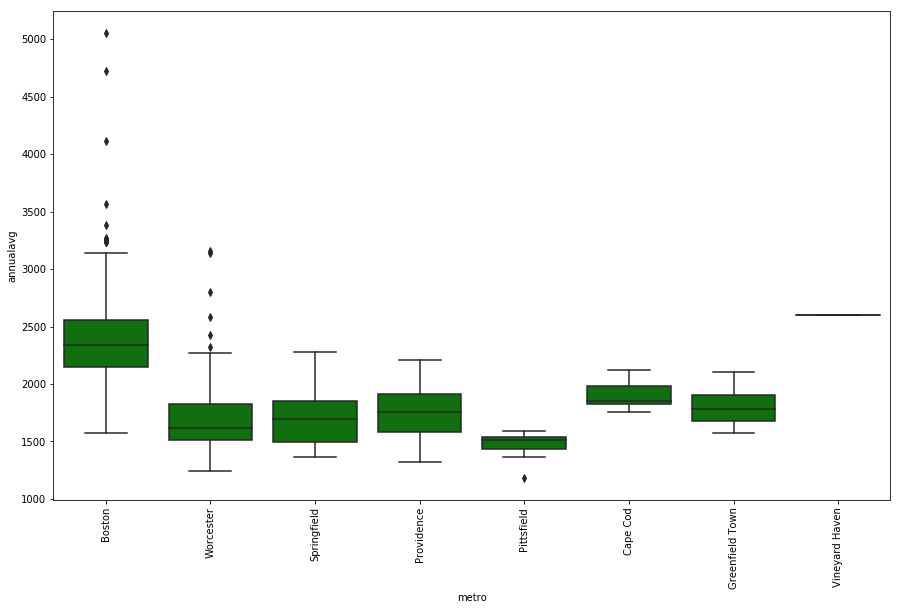

In [22]:
# storing data for state MA 
plt.xticks(rotation='vertical')
sns.boxplot(x='metro',y='annualavg',data=dataMA,color='Green')
# sns.swarmplot(x='city',y='annualavg',data=dataMA,color='Orange')

The above boxplot depicts the Five point summary and we can see that there are a few outliers beyond the normal distribution.
The rent prices are **most expensive in the Boston metro** as compared to other metros in MA and the **lowest in Worcester area**.

(array([  1.23770000e+04,   6.28000000e+02,   7.40000000e+01,
          2.80000000e+01,   1.30000000e+01,   8.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([   532.33333333,   2551.175     ,   4570.01666667,   6588.85833333,
          8607.7       ,  10626.54166667,  12645.38333333,  14664.225     ,
         16683.06666667,  18701.90833333,  20720.75      ]),
 <a list of 10 Patch objects>)

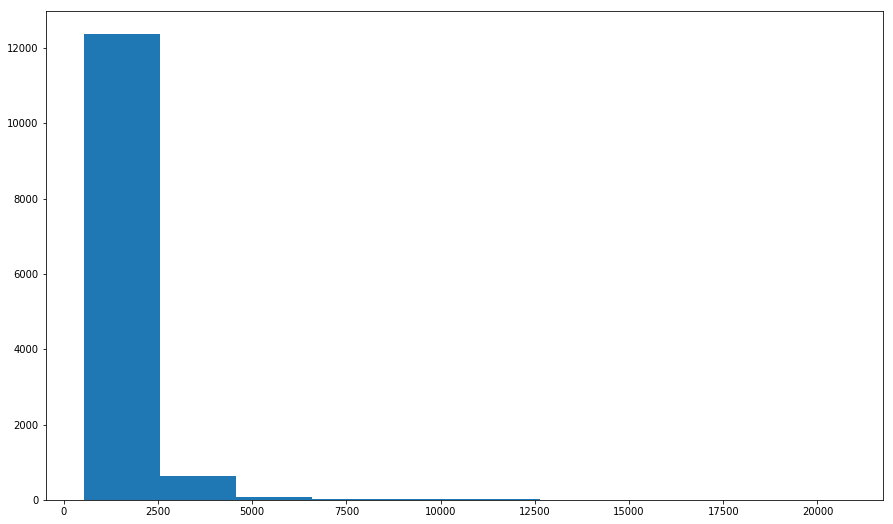

In [23]:
# Histogram of annual average rent for 2016
plt.hist(data2016['annualavg'])

In [25]:
corr_data = data.corr()

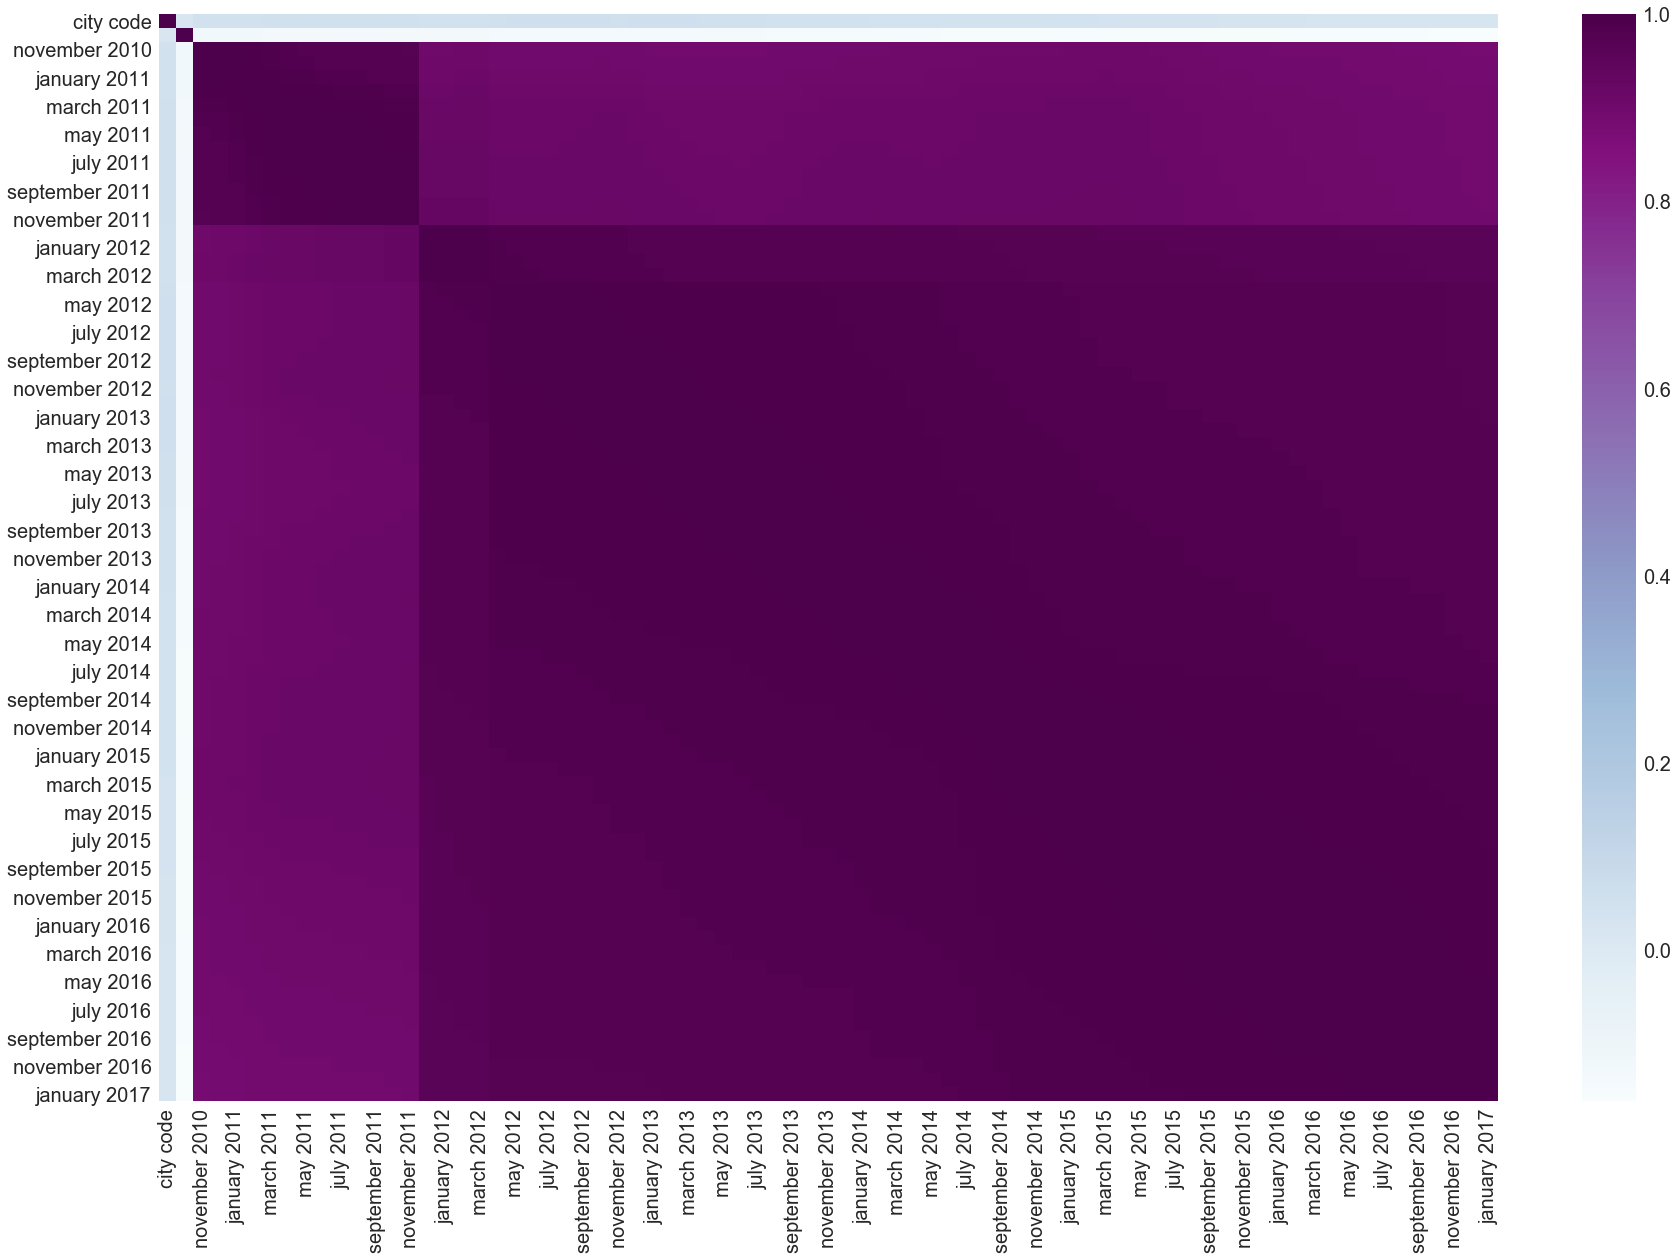

In [42]:
# A heat map is used to find the correlation between various columns in the dataset
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=corr_data, cmap="BuPu")
plt.show()

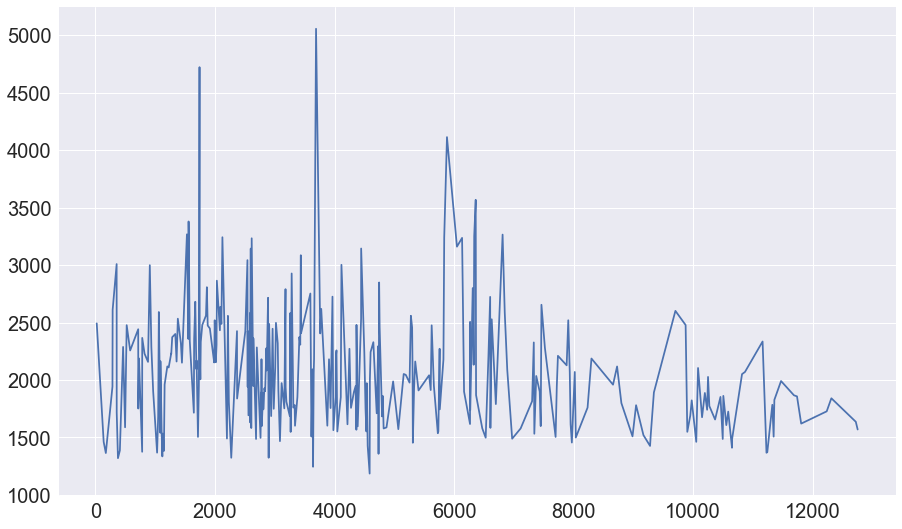

In [46]:
plt.plot(dataMA['annualavg'])

The above plot shows us that the annual average rent prices in the state of MA for the year 2016

In [28]:
top10 = data2016.sort_values(by=['annualavg'], ascending=False).head(10)
top10

,city code,city,metro,county,state,january 2016,february 2016,march 2016,april 2016,may 2016,june 2016,july 2016,august 2016,september 2016,october 2016,november 2016,december 2016,annual,annualavg
12234,124901,Jupiter Island,Port St. Lucie,Martin,FL,22113,22176,21892,21344,20547,20400,20639,20695,20615,20163,19460,18605,248649,20720.750000
5151,30280,Atherton,San Francisco,San Mateo,CA,16955,17333,17645,17786,17705,17593,17452,17266,17059,16831,16714,16571,206910,17242.500000
12780,4721,Fisher Island,Miami-Fort Lauderdale,Miami-Dade,FL,14098,13694,13432,13305,13836,14181,14478,14735,15007,15193,15271,15159,172389,14365.750000
11052,38980,Hidden Hills,Los Angeles,Los Angeles,CA,12168,12220,12273,12319,12389,12580,12760,12824,12734,12586,12479,12444,149776,12481.333333
9489,10348,Belvedere,San Francisco,Marin,CA,12320,12301,12409,12509,12614,12690,12689,12685,12580,12408,12099,11789,149093,12424.416667
10253,6822,Rolling Hills,Los Angeles,Los Angeles,CA,11985,12025,11964,11909,11918,11940,11957,11936,11906,11901,11996,12172,143609,11967.416667
3847,55743,Hillsborough,San Francisco,San Mateo,CA,11465,11783,11968,12108,11961,11845,11712,11544,11405,11340,11429,11566,140126,11677.166667
4928,32578,Los Altos Hills,San Jose,Santa Clara,CA,11096,11512,11692,11757,11326,11071,10915,10765,10632,10545,10509,10471,132291,11024.250000
7051,16583,Portola Valley,San Francisco,San Mateo,CA,10951,11592,11871,11996,11452,11117,10837,10551,10341,10266,10341,10434,131749,10979.083333
8436,7882,Westlake,Dallas-Fort Worth,Tarrant,TX,11164,10800,10572,10414,10704,10906,11051,11145,11199,11233,11230,11210,131628,10969.000000


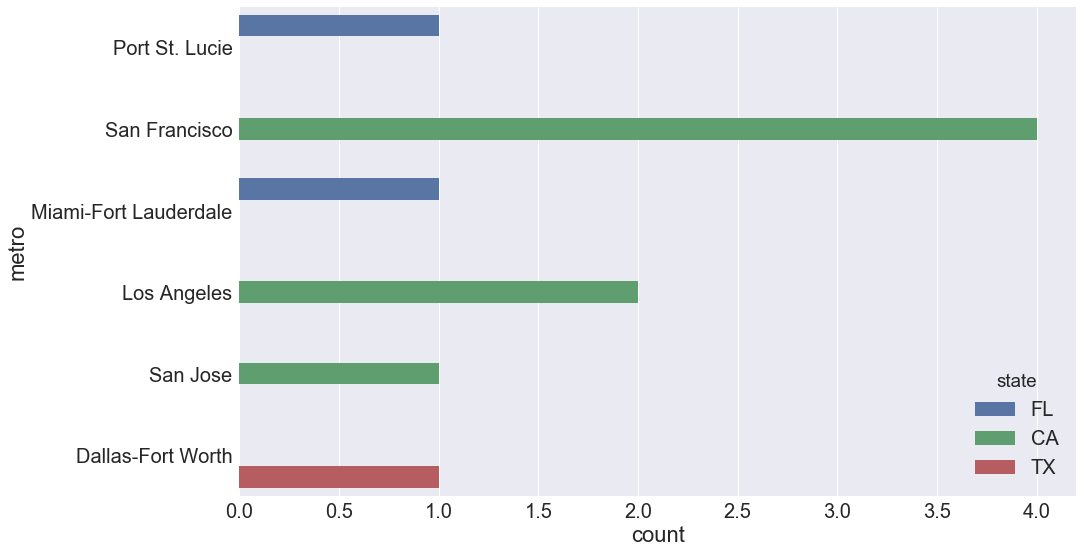

In [47]:
sns.countplot(y="metro", hue="state", data=top10)

The Top 10 expensive states sorted by the Annual Average for the year 2016 with **Florida** being the Expensive City followed by **California**